# Proyecto TASEP

## Bibliotecas

In [9]:
import numpy as np
import time
import matplotlib.pyplot as plt
import copy
import cv2
import tqdm
import json
from utils.VideoWriter import *
from utils.RepartitionFunction import *
from utils.LeyNumberParticules import *
from utils.MoveLey import *
from utils.InitialLey import *
from utils.Grid import *
from utils.Saturation import *

In [ ]:
N_particles_init = 50
N_steps = 10**2*5
sparsity = 1
spawn_rate_param = 0.01

### Case Uni

x_coords = np.array([0])
y_coords = np.array([0])

p = np.array(0.4)
q = np.array(0.4)

cross_axes_prob = [0]
spawn_pos = 5


### Case Multi
"""
x_coords = np.array([0])
y_coords = np.array([0])

p = np.array([0.5, 0.2])
q = np.array([0.3, 0.1])

cross_axes_prob = [1/3, 1/3, 1/3]
spawn_pos = np.array([5, None]) # or [None, None] or [7,2] for example
"""
### Case Multi_HD
"""
x_coords = np.array([-30, -20, -10, 0, 10, 20, 30])
y_coords = np.array([-30, -20, -10, 0, 10, 20, 30])

#p = np.array([[0.2,0.5], [0.7, 0.05]])
#q = np.array([[0.2,0.5], [0.1, 0.6]])
#p = np.ones((2,2))/3
#q = np.ones((2,2))/3

p = np.ones((2,7))/3
q = np.ones((2,7))/3


cross_axes_prob = None
spawn_pos = np.array([[5,None], [None, -3]])
"""

params = {"p": spawn_rate_param, "spawn_pos" :spawn_pos, "x_axis" : x_coords, "y_axis" : y_coords}

## Elegir una configuracion para los axis
0 : solo un axis  
1 : solo un axis horizontal y vertical
2 : multiples axis

In [ ]:
case_grid = 0
match case_grid:
    case 0:
        val_initial_ley = "uniform_uni"
    case 1:
        val_initial_ley = "uniform_multi"
    case 2:
        val_initial_ley = "approx_multiHD"

## Elegir un tipo de movimiento
0: movimiento a la derecha
1: movimiento por los dos lados

In [12]:
move_type = 1

match move_type:
    case 0:
        move_type_name = "bernoulli_right_sequential_" + ["uni", "multi", "HD"][case_grid]
    case 1:
        move_type_name = "bernoulli_both_sequential_" + ["uni", "multi", "HD"][case_grid]

## Elegir una ley de crecimiento
0: no variacion
1: variacion con una ley Bernoulli
2: variacion con una ley Binomial

In [ ]:
case_growth = 0
match case_growth:
    case 0:
        growth_law = "stable"
    case 1:
        growth_law = "Bernoulli"
    case 2:
        growth_law = "Binomial"


## Elegir un tipo de insercion
0: stable
1: spawn between particles
2: spawn at the same place
3: spawn behind all the particles

In [ ]:
insert_type = 0
match insert_type:
    case 0:
        insert_type_name = "stable"
    case 1:
        insert_type_name = "spawn_between"
    case 2:
        insert_type_name = "spawn_fixed"
    case 3:
        insert_type_name = "spawn_back"

In [15]:
initial_ley = Initial_Ley(val_initial_ley, x_coordinates=x_coords, y_coordinates=y_coords, sparsity=sparsity)
size_N = Ley_Number_Particules(insert_type_name, growth_law, kwargs=params)
move_ley = Move_Ley(move_type_name, p, q = q, cross_axes_prob=cross_axes_prob) 
obj = Grid(N_particles_init, initial_ley, N_steps, move_ley, size_N, ["uni", "multi", "multi_HD"][case_grid], x_lines=x_coords, y_lines=y_coords, simul_type="sequential", verif_mode=False)

## Run the simulation

In [16]:
obj.run_simulation()

rec = {"N_particles_init": N_particles_init, "N_steps": N_steps, "sparsity": sparsity, "spawn_rate_param": spawn_rate_param, "x_coords" : x_coords.tolist(), 
       "y_coords":y_coords.tolist(), "p": np.array(p).tolist(), "q": np.array(q).tolist(), "cross_axes_prob" : np.array(cross_axes_prob).tolist(), "spawn_pos": np.array(spawn_pos).tolist(), "growth_law": growth_law, "insert_type_name" : insert_type_name}

with open("result/parameters.txt", 'w') as file:
       file.write(json.dumps(rec))

100%|██████████| 500/500 [00:00<00:00, 706.94it/s]


## Video del movimiento

In [ ]:
save = False

save_path_move = "result/movimiento.mp4"
if save:
    VW = VideoWriter(["uni", "multi", "multi_HD"][case_grid], x_coords, y_axis=y_coords)
    VW(save_path_move, obj.positions_record)

## Video de la funcion de altura

Cuidado: se necesita aqui el modulo FFMpeg y su localizacion, asi que hay qye entregar su direccion.

Es posible descargar el proyecto aqui: [Github link](https://github.com/GyanD/codexffmpeg/releases/tag/2024-11-03-git-df00705e00).

Hay que day la direccion hasta ffmpeg.exe, como _C:\Users\Papa_Pitufo\Downloads\ ...\ffmpeg.exe_

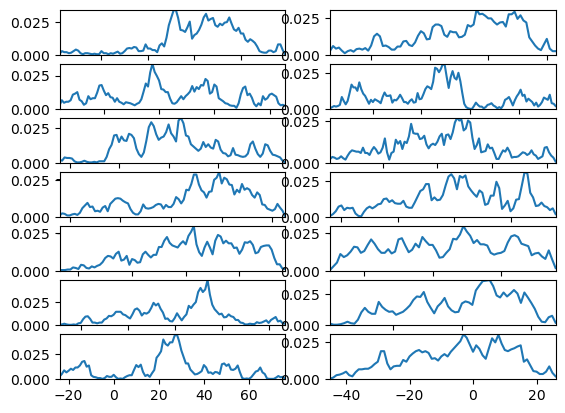

In [18]:
save = True

save_path_vid_altura = "result/altura_vid.mp4"
ffmpeg_dir = r"C:\Users\antoine\Downloads\ffmpeg\bin\ffmpeg.exe"

if save:
    VW_rep = VideoWriterRepartition(["uni", "multi", "multi_HD"][case_grid], x_coords, ffmpeg_dir, y_axis=y_coords)
    VW_rep(save_path_vid_altura, obj.positions_record)

## Funcion de altura final

In [19]:
save_path_altura = "result/altura_fig.png"

rep_func = Repartition_Function(["uni", "multi", "multi_HD"][case_grid])
rep_func(obj.positions_record, save_path_altura)

# Saturacion

In [20]:
save_path_sat = "result/saturation.png"

saturation_func = SaturationEstimator(["uni", "multi", "HD"][case_grid], growth_law, p, q)
saturation_func(obj.positions_record, save_path_sat)


TypeError: 'NoneType' object is not callable